# Download NLTK

In [1]:
!pip install nltk

# Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import accuracy_score,precision_score

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Read CSV
df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

In [5]:
df.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [7]:
df.rename(columns = {'2401':'id', 'Borderlands': 'Company', 'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'text'}, inplace = True)

In [8]:
df.head()

,id,Company,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.drop(columns=['id','Company'],inplace=True)

In [10]:
df.head(6)

,Sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
5,Positive,So I spent a few hours making something for fu...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  74681 non-null  object
 1   text       73995 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [12]:
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [13]:
df.drop(df[df['Sentiment'] == 'Irrelevant'].index, inplace = True)
df.head()

,Sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [14]:
df.isnull().sum()

Sentiment      0
text         571
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df.shape

(61120, 2)

In [17]:
df.duplicated().sum()

3636

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

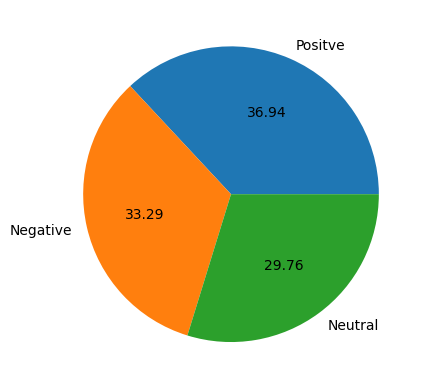

In [20]:
plt.pie(df['Sentiment'].value_counts(), labels=['Positve','Negative', 'Neutral'],autopct="%0.2f")
plt.show()

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Sentiment,text,num_characters,num_words,num_sentences
0,Positive,I am coming to the borders and I will kill you...,51,13,1
1,Positive,im getting on borderlands and i will kill you ...,50,11,1
2,Positive,im coming on borderlands and i will murder you...,51,11,1
3,Positive,im getting on borderlands 2 and i will murder ...,57,13,1
4,Positive,im getting into borderlands and i can murder y...,53,11,1


In [25]:
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

In [26]:
encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [27]:
df.head()

,Sentiment,text,num_characters,num_words,num_sentences
0,2,I am coming to the borders and I will kill you...,51,13,1
1,2,im getting on borderlands and i will kill you ...,50,11,1
2,2,im coming on borderlands and i will murder you...,51,11,1
3,2,im getting on borderlands 2 and i will murder ...,57,13,1
4,2,im getting into borderlands and i can murder y...,53,11,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

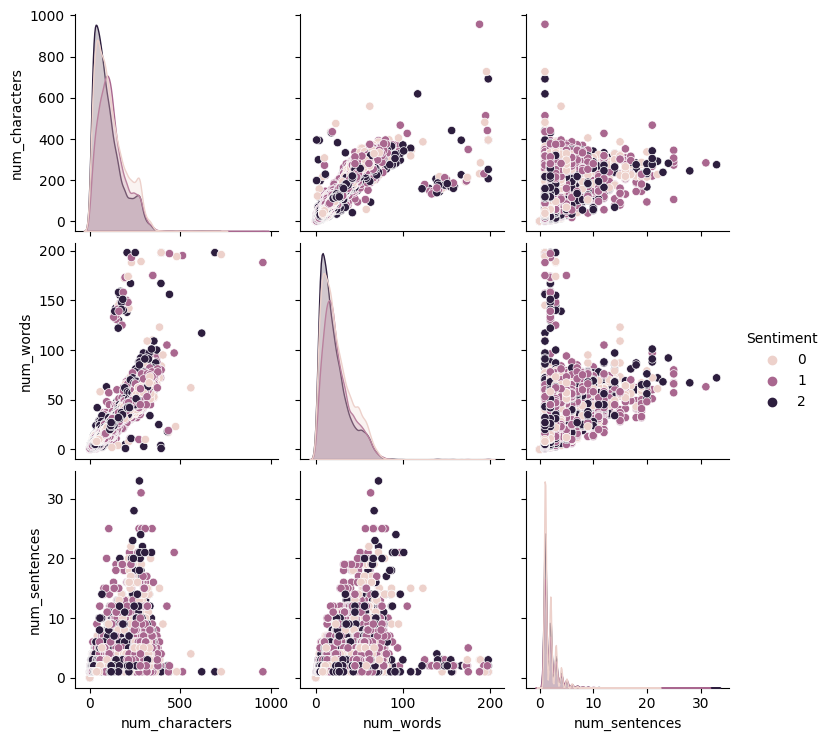

In [28]:
sns.pairplot(df,hue='Sentiment')

<Axes: >

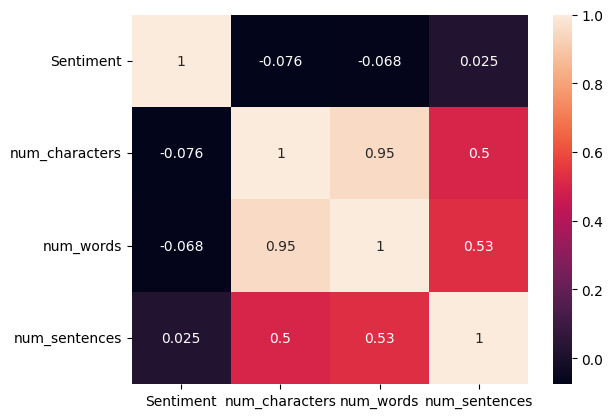

In [29]:
df_numeric = df.select_dtypes(include = 'number')
sns.heatmap(df_numeric.corr(),annot=True)

# Data Preprocessing

In [30]:
ps = PorterStemmer()

In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,Sentiment,text,num_characters,num_words,num_sentences,transformed_text
0,2,I am coming to the borders and I will kill you...,51,13,1,come border kill
1,2,im getting on borderlands and i will kill you ...,50,11,1,im get borderland kill
2,2,im coming on borderlands and i will murder you...,51,11,1,im come borderland murder
3,2,im getting on borderlands 2 and i will murder ...,57,13,1,im get borderland 2 murder
4,2,im getting into borderlands and i can murder y...,53,11,1,im get borderland murder


In [35]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Sentiment'] == 0]['transformed_text'].str.cat(sep=" "))

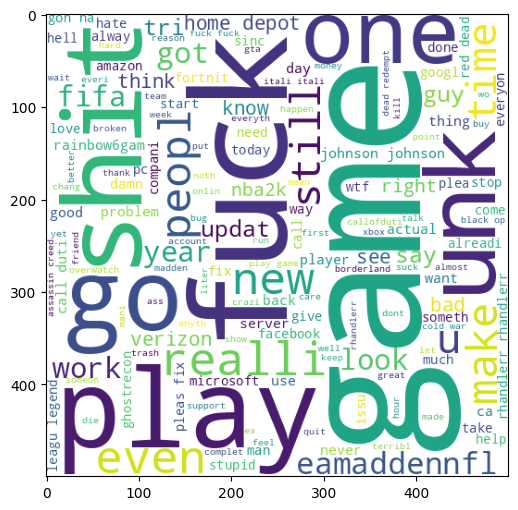

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

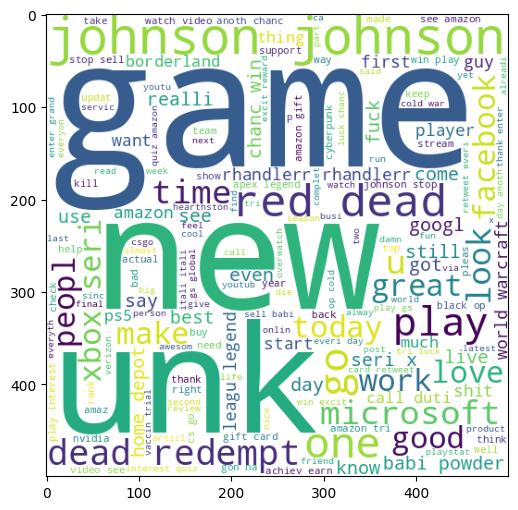

In [37]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Sentiment'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# TF-IDF apply

In [38]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['Sentiment'].values

In [39]:
print(X.shape)
print(y.shape)

(57484, 3000)
(57484,)


## Split the data

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## Model Building

In [41]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [42]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'xgb':xgb
}

In [43]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    return accuracy,precision

In [44]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
#     
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [45]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [46]:
performance_df.reset_index(drop = True)

,Algorithm,Accuracy,Precision
0,RF,0.900496,0.900509
1,KN,0.879012,0.888043
2,LR,0.723232,0.721645
3,xgb,0.682874,0.697089
4,NB,0.693833,0.693802
5,AdaBoost,0.567539,0.598443
6,DT,0.413673,0.587233
